# Google Business Statistics

Author:
- Reinaldo Augusto

Status:
- DONE

Goal:
- Exploratory Data Analysis of the evolution of the ratings and the length of the GB reviews.

In [4]:
from util import agg_jsonls  # helper function
from pprint import pprint
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
from src.maps import tag_map, relative_date
%matplotlib inline

## Importing the Google Business dataset

In [3]:
unique_ids = set()
reviewsGB = []
for complaint in agg_jsonls("final_dataset_GB_1704"):
    if "id_review" in complaint and complaint["id_review"] not in unique_ids:
        unique_ids.add(complaint["id_review"])
        reviewsGB.append(complaint)

print(f"We have a total of {len(reviewsGB)} reviews!")

We have a total of 140416 reviews!


In [6]:
def comment_day(review):
    init_dt = datetime.strptime(review["retrieval_date"], '%Y-%m-%dT%H:%M:%SZ')
    relative = relative_date[review['relative_date']]
    return init_dt - timedelta(days=relative)

def format_GB_to_df(review):
    cols_for_df = ['caption', 'geo_location', 'id_review' , 'n_photo_user', 'n_review_user', 
                   'rating' , 'relative_date', 'retrieval_date', 'store', 'url_user', 'username']
    r_cp = {col: review[col] for col in cols_for_df if col in review}
    r_cp["len_comment"] = len(review['caption'])
    r_cp["relative"] = relative_date[review['relative_date']]
    r_cp["date_comment"] = comment_day(review)
    return r_cp

In [7]:
dff = pd.DataFrame([format_GB_to_df(row) for row in reviewsGB])
dff.head()

,caption,date_comment,geo_location,id_review,len_comment,n_photo_user,n_review_user,rating,relative,relative_date,retrieval_date,store,url_user,username
0,Muito boa! O Cleversom nos atendeu com muita ...,2020-03-23 17:25:36,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNjdGN1SHJnRRABGhY3RXo1WS...,64,0,0,4.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1097179363...,Veranilce Carelli
1,Atendimento muito bom.!,2020-03-23 17:25:36,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNjNWNHYXRBRRABGhZ2Z1lLMj...,23,0,0,5.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1155639396...,Mathias Villan
2,,2020-03-23 17:25:36,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChZDSUhNMG9nS0VJQ0FnSUNjaFphblhBEAEaFmM0cTBhaV...,0,0,6,5.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1147321611...,Maristela Boguta
3,,2020-03-23 17:25:36,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNjaGNidzNBRRABGhZ4Z3Z6bG...,0,0,5,5.0,21,3 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1067857579...,Daniele Andrade
4,👍🏼,2020-03-16 17:25:36,"{'lat': '-23.5448085', 'long': '-46.5175485'}",ChdDSUhNMG9nS0VJQ0FnSUNjLWFHYjF3RRABGhZROFBDNF...,2,0,0,5.0,28,4 semanas atrás,2020-04-13T17:25:36Z,casas-bahia,https://www.google.com/maps/contrib/1042944931...,Pastor L L j


In [8]:
dff['year'] = dff['date_comment'].dt.year
dff['month'] = dff['date_comment'].dt.strftime('%m/%Y')
dff['week'] = dff['date_comment'].dt.week

### Measuring the evolution of the ratings

In [9]:
var_month = ['um ano atrás', '11 meses atrás', '10 meses atrás', '9 meses atrás', '8 meses atrás', 
             '7 meses atrás', '6 meses atrás', '5 meses atrás', '4 meses atrás', '3 meses atrás', 
             '2 meses atrás', 'um mês atrás', '4 semanas atrás', '3 semanas atrás','uma semana atrás','2 semanas atrás']


def evolution_graph(data, store, period):
    graph = data[data['store']==store].copy()
    if(period=='year'):
        graph = graph.groupby([period]).mean().reset_index()
        graph['year'] = pd.to_datetime(graph['year'], format="%Y")
        plt.plot(graph[period].dt.strftime('%Y'), graph['rating'],marker='.')
        plt.title(store)
        plt.axes.Axes.set_yticks([1.0,2.0,3.0,4.0,5.0])
    elif(period=='month'):
        graph = graph[graph['relative_date'].isin(var_month)].groupby([period]).agg({'rating':'mean',
                                                                                     'date_comment':'max'}).reset_index()
        plt.plot(graph['date_comment'].sort_values(), graph['rating'],marker='.')
        plt.title(store)
        #plt.xticks(rotation = 45)

- The evolution of the ratings per store per year

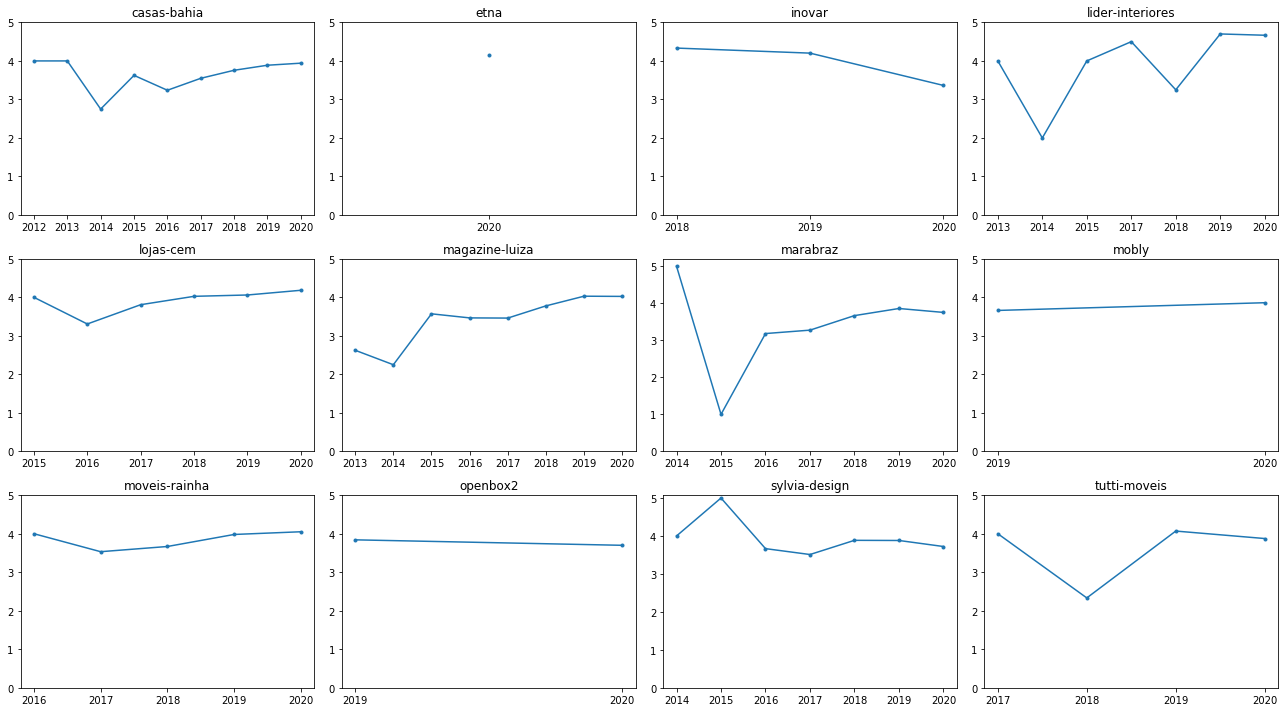

In [47]:
j=1
fig = plt.figure(figsize=(18,10))
for i in dff[~dff['store'].isna()]['store'].unique():
    ax1 = plt.subplot(3,4,j)
    graph = dff[dff['store']==i].copy()
    graph = graph.groupby('year').mean().reset_index()
    graph['year'] = pd.to_datetime(graph['year'], format="%Y")
    plt.plot(graph['year'].dt.strftime('%Y'), graph['rating'],marker='.')
    plt.title(i)
    ax1.set_yticks([0.0,1.0,2.0,3.0,4.0,5.0])
    j=j+1
plt.tight_layout()

- The evolution of the ratings per store per month

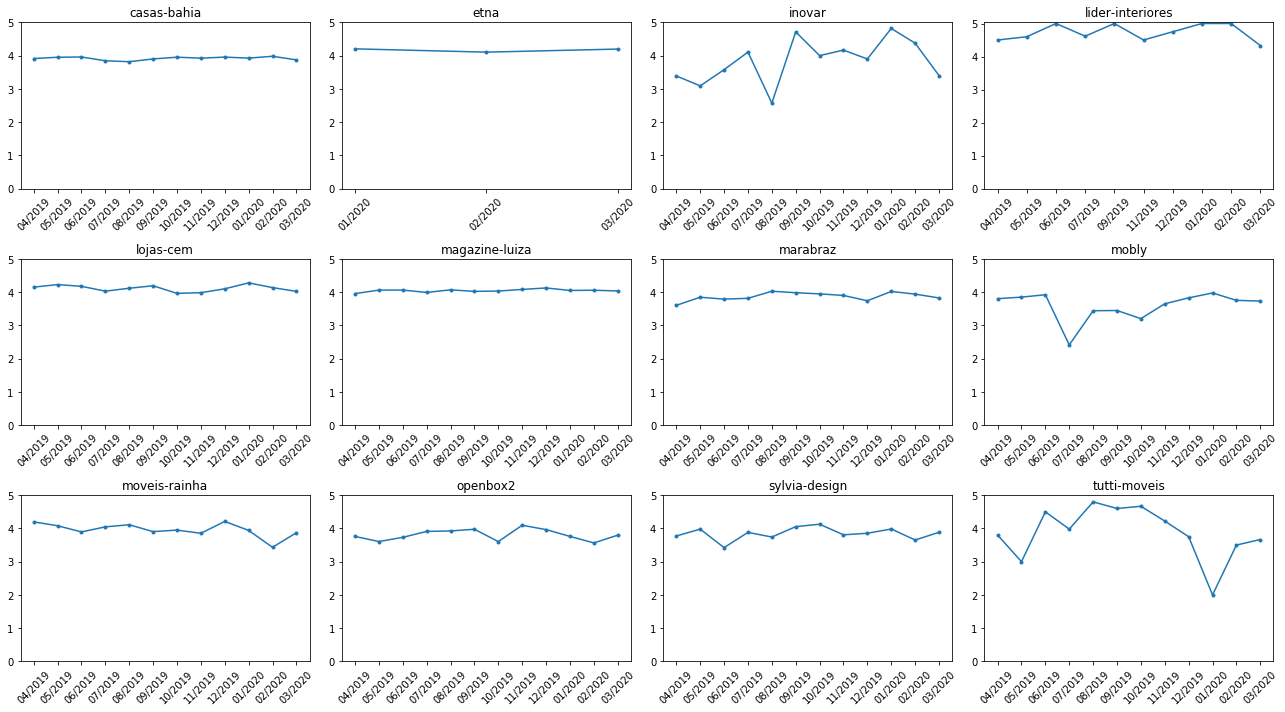

In [54]:
j=1
fig = plt.figure(figsize=(18,10))
for i in dff[~dff['store'].isna()]['store'].unique():
    ax1 = plt.subplot(3,4,j)
    graph = dff[dff['store']==i].copy()
    graph = graph[graph['relative_date'].isin(var_month)].groupby(['month']).agg({'rating':'mean',
                                                                                     'date_comment':'max'}).reset_index()
    plt.plot(graph['date_comment'].sort_values().dt.strftime('%m/%Y'), graph['rating'],marker='.')
    plt.title(i)
    ax1.set_yticks([0.0,1.0,2.0,3.0,4.0,5.0])
    plt.xticks(rotation=45)
    j=j+1
plt.tight_layout()

### Anlysing the comment length

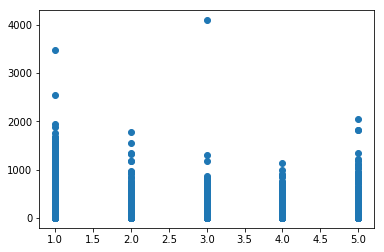

In [57]:
plt.scatter(y = dff[dff['len_comment']>0]['len_comment'], x=dff[dff['len_comment']>0]['rating']);

We can see that we have a great number of review without any comment, but it is also to see that normally the people who does not liked something tend to write more.

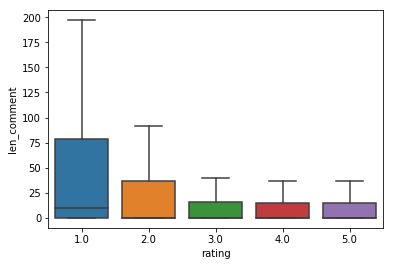

In [62]:
sns.boxplot(y = dff['len_comment'], x=dff['rating'],showfliers=False);

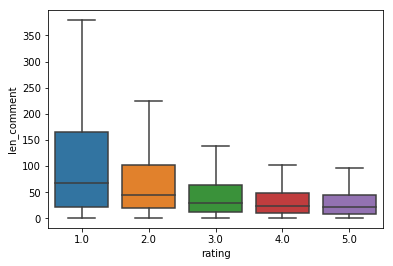

In [61]:
sns.boxplot(y = dff[dff['len_comment']>0]['len_comment'], x=dff[dff['len_comment']>0]['rating'],showfliers=False);

We can also see a low correlation between the two variables of -0.2. But when we take out the reviews without comments, we see that correlation increases to -0.29.

In [15]:
dff[['len_comment','rating']].corr()

,len_comment,rating
len_comment,1.000000,-0.208457
rating,-0.208457,1.000000


In [65]:
dff[dff['len_comment']>0][['len_comment','rating']].corr()

,len_comment,rating
len_comment,1.000000,-0.293935
rating,-0.293935,1.000000


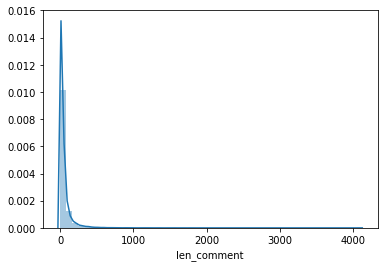

In [66]:
sns.distplot(dff[dff['len_comment']>0]['len_comment']);

### Hypothesys Testing

We want to see if the means of the comments' length changes when we have good or bad ratings.

In [11]:
from scipy import stats

In [73]:
gb = dff.groupby(['rating'])
group_names = gb["rating"].unique()
print("\t\t\tstatistic\t\tpvalue")
for i in range(1,len(group_names)):
      for j in range(i+1, len(group_names)+1):
            group1 = gb[["len_comment"]].get_group(i)
            group2 = gb[["len_comment"]].get_group(j)
            stat, pvalue = stats.ttest_ind(group1, group2, equal_var = False)
            print(str(i) + " vs. " + str(j) + "\t\t" + str(stat[0]) + "\t" + str(pvalue[0]))

			statistic		pvalue
1 vs. 2		20.93445881423492	2.9711010586414455e-96
1 vs. 3		36.375216157824994	8.608706658664825e-277
1 vs. 4		39.86906897624372	0.0
1 vs. 5		40.677009178873824	0.0
2 vs. 3		16.863965664600762	5.760805395481736e-63
2 vs. 4		21.551005407019964	2.066190901938113e-100
2 vs. 5		22.646188614277236	3.290566896635717e-110
3 vs. 4		8.902130597875455	5.701201283173325e-19
3 vs. 5		11.506994911997536	1.3962718767149678e-30
4 vs. 5		2.770460494477828	0.0055993470341340525


### Conclusions

It is possible to see that there is a low correlation between length of the comment and the rating that it will get. And also that the Google Business dataset is a good counterpoint to our 